In [91]:
import pickle
with open('donnees_median_power_spectrum.pkl', 'wb') as fichier:
    pickle.dump(median_power_spectrum, fichier)

In [50]:
with open('donnees_mean_high_freq_power.pkl', 'wb') as fichier:
    pickle.dump(mean_high_freq_power, fichier)

NameError: name 'mean_high_freq_power' is not defined

In [ ]:
with open('donnees_global_energies.pkl', 'wb') as fichier:
    pickle.dump(global_energies, fichier)

In [6]:
import time
import pickle

In [51]:
import pickle
with open('donnees_median_power_spectrum.pkl', 'rb') as fichier:
    mean_high_freq_power = pickle.load(fichier)

In [ ]:
with open('donnees_median_power_spectrum.pkl', 'rb') as fichier:
    median_power_spectrum = pickle.load(fichier)

Moyenne spectre de puissance global

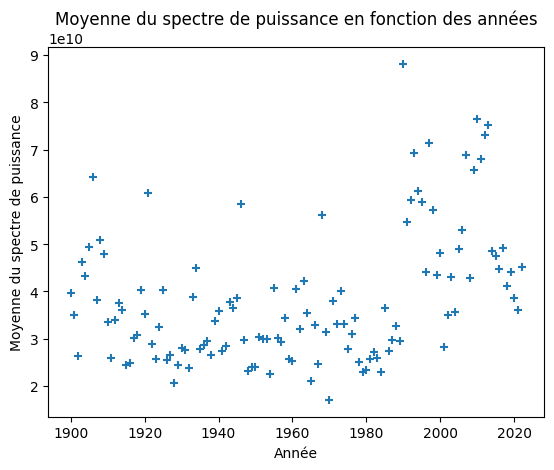

Le programme a mis 1493.7387382984161 secondes à s'exécuter.


In [46]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

temps_debut = time.time()

# Répertoire contenant les images
image_dir = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos'

# Dictionnaire pour stocker les sommes et les nombres de valeurs par année
year_sum = {}
year_count = {}

# Parcourir les fichiers d'images dans le répertoire
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.jpg', '.jpeg')):
        # Extraire l'année à partir du nom de fichier
        year = int(filename.split('-')[0])

        # Charger l'image en niveaux de gris
        image = cv2.imread(os.path.join(image_dir, filename), 0)

        # Appliquer la transformation de Fourier
        fft = np.fft.fft2(image)

        # Décaler le zéro-fréquence au centre du spectre
        shifted_fft = np.fft.fftshift(fft)

        # Calculer le spectre de puissance
        power_spectrum_value = np.abs(shifted_fft) ** 2

        # Calculer la moyenne du spectre de puissance
        power = np.mean(power_spectrum_value)

        # Ajouter la valeur à la somme correspondante
        if year in year_sum:
            year_sum[year] += power
            year_count[year] += 1
        else:
            year_sum[year] = power
            year_count[year] = 1

# Calculer la moyenne par année
years = []
power_spectrum = []
for year in sorted(year_sum.keys()):
    years.append(year)
    power = year_sum[year] / year_count[year]
    power_spectrum.append(power)

# Convertir les listes en tableaux NumPy
years = np.array(years)
power_spectrum = np.array(power_spectrum)

# Tracer le graphique en utilisant plt.scatter
plt.scatter(years, power_spectrum, marker='+')
plt.xlabel('Année')
plt.ylabel('Moyenne du spectre de puissance')
plt.title('Moyenne du spectre de puissance en fonction des années')

# Afficher le graphique
plt.show()

temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")

Moyenne Basses Frequences

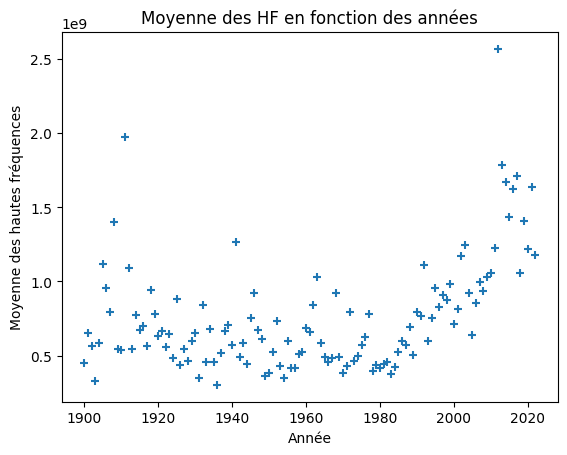

Le programme a mis 495.3059470653534 secondes à s'exécuter.


In [79]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

temps_debut = time.time()

# Répertoire contenant les images
image_dir = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon'

# Dictionnaire pour stocker les sommes et les nombres de valeurs par année
year_sum = {}
year_count = {}

# Paramètres du filtre passe-haut
cutoff_frequency = 0.1  # Fréquence de coupure du filtre (ajustez selon vos besoins)

# Parcourir les fichiers d'images dans le répertoire
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.jpg', '.jpeg')):
        # Extraire l'année à partir du nom de fichier
        year = int(filename.split('-')[0])

        # Charger l'image en niveaux de gris
        image = cv2.imread(os.path.join(image_dir, filename), 0)

        # Appliquer la transformation de Fourier
        fft = np.fft.fft2(image)

        # Décaler le zéro-fréquence au centre du spectre
        shifted_fft = np.fft.fftshift(fft)

        # Calculer le spectre de puissance
        power_spectrum_value = np.abs(shifted_fft) ** 2

        # Appliquer le filtre passe-haut
        rows, cols = power_spectrum_value.shape
        crow, ccol = rows // 2, cols // 2  # Centre du spectre
        mask = np.ones((rows, cols), dtype=np.uint8)
        mask[int(crow - cutoff_frequency * crow):int(crow + cutoff_frequency * crow),
             int(ccol - cutoff_frequency * ccol):int(ccol + cutoff_frequency * ccol)] = 0
        filtered_spectrum = shifted_fft * mask

        # Calculer la moyenne du spectre de puissance après le filtre passe-haut
        power_HF = np.mean(np.abs(filtered_spectrum) ** 2)

        # Ajouter la valeur à la somme correspondante
        if year in year_sum:
            year_sum[year] += power_HF
            year_count[year] += 1
        else:
            year_sum[year] = power_HF
            year_count[year] = 1

# Calculer la moyenne par année
years = []
power_spectrum_HF = []
for year in sorted(year_sum.keys()):
    years.append(year)
    power_HF = year_sum[year] / year_count[year]
    power_spectrum_HF.append(power_HF)

# Convertir les listes en tableaux NumPy
years = np.array(years)
power_spectrum_HF = np.array(power_spectrum_HF)

# Tracer le graphique en utilisant plt.scatter
plt.scatter(years, power_spectrum_HF, marker='+')
plt.xlabel('Année')
plt.ylabel('Moyenne des hautes fréquences')
plt.title('Moyenne des HF en fonction des années')

# Afficher le graphique
plt.show()

temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")


Moyenne Hautes Frequences

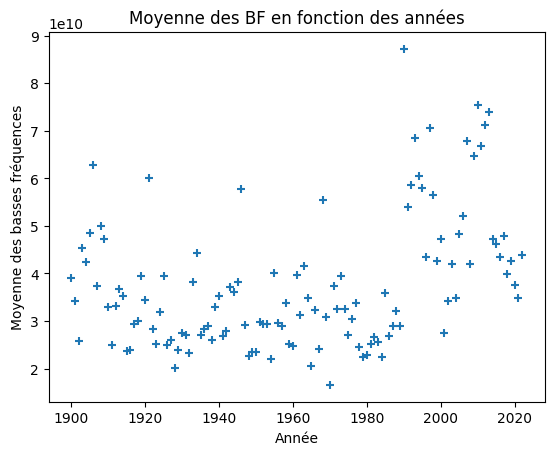

Le programme a mis 1678.7250378131866 secondes à s'exécuter.


In [76]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

temps_debut = time.time()

# Répertoire contenant les images
image_dir = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos'

# Dictionnaire pour stocker les sommes et les nombres de valeurs par année
year_sum = {}
year_count = {}

# Paramètres du filtre passe-bas
cutoff_frequency = 0.1  # Fréquence de coupure du filtre (ajustez selon vos besoins)

# Parcourir les fichiers d'images dans le répertoire
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.jpg', '.jpeg')):
        # Extraire l'année à partir du nom de fichier
        year = int(filename.split('-')[0])

        # Charger l'image en niveaux de gris
        image = cv2.imread(os.path.join(image_dir, filename), 0)

        # Appliquer la transformation de Fourier
        fft = np.fft.fft2(image)

        # Décaler le zéro-fréquence au centre du spectre
        shifted_fft = np.fft.fftshift(fft)

        # Calculer le spectre de puissance
        power_spectrum_value = np.abs(shifted_fft) ** 2

        # Appliquer le filtre passe-bas
        rows, cols = power_spectrum_value.shape
        crow, ccol = rows // 2, cols // 2  # Centre du spectre
        mask = np.zeros((rows, cols), dtype=np.uint8)
        mask[int(crow - cutoff_frequency * crow):int(crow + cutoff_frequency * crow),
             int(ccol - cutoff_frequency * ccol):int(ccol + cutoff_frequency * ccol)] = 1
        filtered_spectrum = shifted_fft * mask

        # Calculer la moyenne du spectre de puissance après le filtre passe-bas
        power_LF = np.mean(np.abs(filtered_spectrum) ** 2)

        # Ajouter la valeur à la somme correspondante
        if year in year_sum:
            year_sum[year] += power_LF
            year_count[year] += 1
        else:
            year_sum[year] = power_LF
            year_count[year] = 1

# Calculer la moyenne par année
years = []
power_spectrum_LF = []
for year in sorted(year_sum.keys()):
    years.append(year)
    power_LF = year_sum[year] / year_count[year]
    power_spectrum_LF.append(power_LF)

# Convertir les listes en tableaux NumPy
years = np.array(years)
power_spectrum_LF = np.array(power_spectrum_LF)

# Tracer le graphique en utilisant plt.scatter
plt.scatter(years, power_spectrum_LF, marker='+')
plt.xlabel('Année')
plt.ylabel('Moyenne des basses fréquences')
plt.title('Moyenne des BF en fonction des années')

# Afficher le graphique
plt.show()

temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")


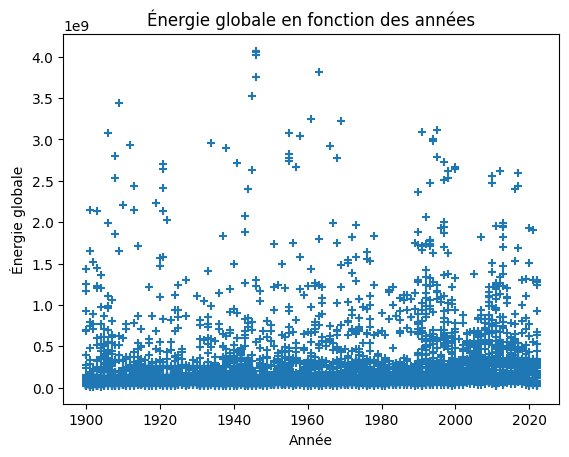

In [88]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Répertoire contenant les images
image_dir = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos'

# Listes pour stocker les années et les énergies globales
years = []
global_energies = []

# Parcourir les fichiers d'images dans le répertoire
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.jpg', '.jpeg')):
        # Extraire l'année à partir du nom de fichier
        year = int(filename.split('-')[0])
        years.append(year)

        # Charger l'image en niveaux de gris
        image = cv2.imread(os.path.join(image_dir, filename), 0)

        # Calculer l'énergie globale de l'image
        global_energy = np.sum(image ** 2)
        global_energies.append(global_energy)

# Convertir les listes en tableaux NumPy
years = np.array(years)
global_energies = np.array(global_energies)

# Créer le graphique
plt.scatter(years, global_energies, marker='+')
plt.xlabel('Année')
plt.ylabel('Énergie globale')
plt.title('Énergie globale en fonction des années')

# Afficher le graphique
plt.show()


Énergie globale : La valeur totale de l'énergie du spectre de puissance peut vous donner une idée de l'intensité globale de l'image. Une image plus lumineuse aura généralement une plus grande énergie globale.

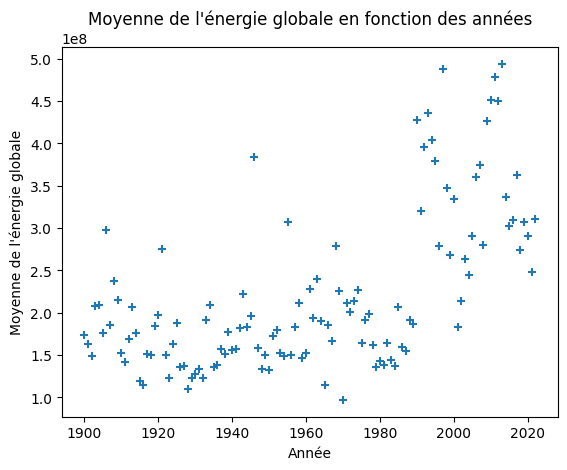

In [78]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Répertoire contenant les images
image_dir = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos'

# Dictionnaire pour stocker les sommes et les nombres de valeurs par année
year_sum = {}
year_count = {}
dtype = np.float64  # Utilisez un type de données à virgule flottante de plus grande capacité

# Parcourir les fichiers d'images dans le répertoire
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.jpg', '.jpeg')):
        # Extraire l'année à partir du nom de fichier
        year = int(filename.split('-')[0])

        # Charger l'image en niveaux de gris
        image = cv2.imread(os.path.join(image_dir, filename), 0)

        # Calculer l'énergie globale de l'image
        global_energy = np.sum(image ** 2)

        # Ajouter la valeur à la somme correspondante
        year_sum[year] = np.add(year_sum.get(year, 0), global_energy, dtype=dtype)
        year_count[year] = np.add(year_count.get(year, 0), 1, dtype=dtype)

# Calculer la moyenne par année
years = []
average_global_energies = []
for year in sorted(year_sum.keys()):
    years.append(year)
    average_global_energy = year_sum[year] / year_count[year]
    average_global_energies.append(average_global_energy)

# Convertir les listes en tableaux NumPy
years = np.array(years)
average_global_energies = np.array(average_global_energies)

# Créer le graphique
plt.scatter(years, average_global_energies, marker='+')
plt.xlabel('Année')
plt.ylabel('Moyenne de l\'énergie globale')
plt.title('Moyenne de l\'énergie globale en fonction des années')

# Afficher le graphique
plt.show()


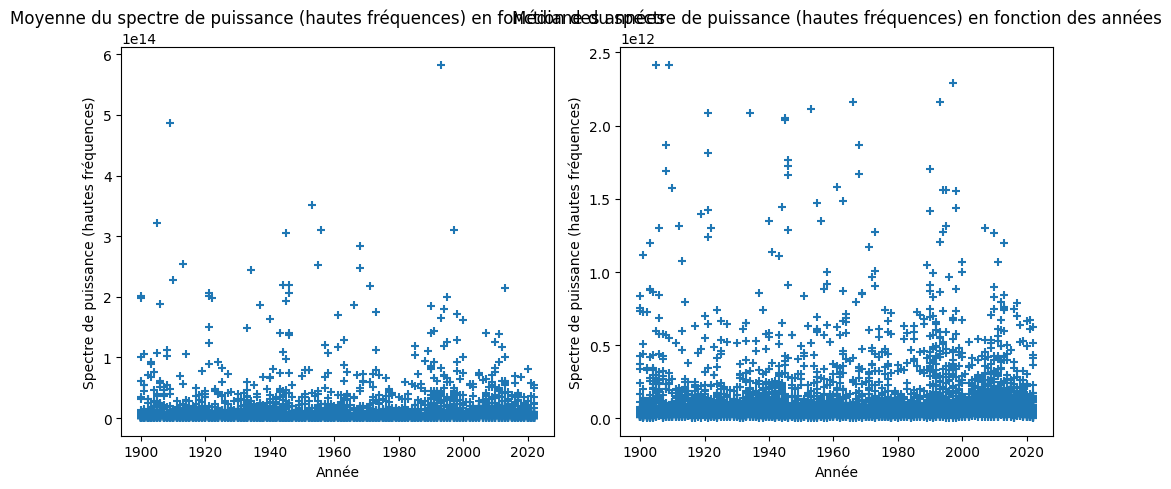

In [87]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Répertoire contenant les images
image_dir = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos'

# Listes pour stocker les années, les moyennes et les médianes
years = []
mean_high_freq_power = []
median_high_freq_power = []

# Parcourir les fichiers d'images dans le répertoire
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.jpg', '.jpeg')):
        # Extraire l'année à partir du nom de fichier
        year = int(filename.split('-')[0])
        years.append(year)

        # Charger l'image en niveaux de gris
        image = cv2.imread(os.path.join(image_dir, filename), 0)

        # Appliquer la transformation de Fourier
        fft = np.fft.fft2(image)

        # Décaler le zéro-fréquence au centre du spectre
        shifted_fft = np.fft.fftshift(fft)

        # Calculer le spectre de puissance
        power_spectrum = np.abs(shifted_fft) ** 2

        # Calculer les indices des hautes fréquences
        rows, cols = power_spectrum.shape
        center_row, center_col = rows // 2, cols // 2
        high_freq_indices = np.where(power_spectrum > np.mean(power_spectrum))

        # Créer un masque pour les hautes fréquences
        high_freq_mask = np.zeros_like(power_spectrum)
        high_freq_mask[high_freq_indices] = 1

        # Appliquer le masque aux hautes fréquences
        high_freq_power_spectrum = power_spectrum * high_freq_mask

        # Vérifier si des valeurs non nulles sont présentes pour les hautes fréquences
        if np.any(high_freq_power_spectrum):
            # Calculer la moyenne et la médiane du spectre de puissance des hautes fréquences
            mean_high_freq_power_value = np.mean(high_freq_power_spectrum[high_freq_power_spectrum > 0])
            median_high_freq_power_value = np.median(high_freq_power_spectrum[high_freq_power_spectrum > 0])
        else:
            # Aucune valeur non nulle pour les hautes fréquences
            mean_high_freq_power_value = 0
            median_high_freq_power_value = 0

        # Vérifier si les valeurs calculées sont valides
        if np.isnan(mean_high_freq_power_value):
            mean_high_freq_power_value = 0
        if np.isnan(median_high_freq_power_value):
            median_high_freq_power_value = 0

        mean_high_freq_power.append(mean_high_freq_power_value)
        median_high_freq_power.append(median_high_freq_power_value)

# Convertir les listes en tableaux NumPy
years = np.array(years)
mean_high_freq_power = np.array(mean_high_freq_power)
median_high_freq_power = np.array(median_high_freq_power)

# Créer la figure et les sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Tracer le premier graphique
ax1.scatter(years, mean_high_freq_power, marker='+')
ax1.set_xlabel('Année')
ax1.set_ylabel('Spectre de puissance (hautes fréquences)')
ax1.set_title('Moyenne du spectre de puissance (hautes fréquences) en fonction des années')

# Tracer le deuxième graphique
ax2.scatter(years, median_high_freq_power, marker='+')
ax2.set_xlabel('Année')
ax2.set_ylabel('Spectre de puissance (hautes fréquences)')
ax2.set_title('Médiane du spectre de puissance (hautes fréquences) en fonction des années')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()


In [1]:
import pickle
with open('donnees_resolutions.pkl', 'rb') as fichier:
    resolutions = pickle.load(fichier)

In [2]:
resolutions

[288000,
 578700,
 426400,
 1199360,
 809984,
 613376,
 639900,
 718848,
 615424,
 689152,
 558000,
 187000,
 336000,
 762000,
 757600,
 813600,
 792000,
 777600,
 956000,
 802400,
 2625558,
 1154560,
 413184,
 13820544,
 781312,
 8420758,
 1028400,
 422400,
 410880,
 3860000,
 305920,
 787456,
 6101096,
 302400,
 535680,
 2073600,
 305280,
 708608,
 305920,
 823296,
 881664,
 617472,
 11234210,
 238000,
 1366300,
 11644000,
 872000,
 1099520,
 313600,
 765952,
 546816,
 289920,
 825344,
 806912,
 353890,
 314240,
 273280,
 1295360,
 7478396,
 645120,
 1282560,
 237600,
 2419956,
 655422,
 423200,
 919200,
 20141034,
 282880,
 628736,
 705600,
 1016832,
 177056,
 346390,
 319360,
 316160,
 318080,
 1254500,
 296960,
 1128960,
 817152,
 329600,
 172500,
 286080,
 1125120,
 4286400,
 1001472,
 1172480,
 3050000,
 1056768,
 1051648,
 257280,
 1167103,
 320640,
 295680,
 358400,
 428562,
 268160,
 7142121,
 1036288,
 873472,
 328960,
 701440,
 870400,
 221400,
 241280,
 1703295,
 6501000,
